### Import libraries and file

In [1]:
import pandas as pd
import csv
import numpy as np
import warnings
from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import complete, fcluster
from scipy.cluster.hierarchy import linkage
import seaborn as sns
from kmedoids import kmedoids

### Load npy file

In [2]:
matrix = np.load('/mnt/files/matrix.npy')

### Result Shapes

In [3]:
matrix.shape

(95458, 1226)

### Slicing consider similar objects

In [4]:
row_idx = np.array([8,25,49,51,52,53,55,56,60,79,116,159,166,171,219,352,373,389,390,394,395,396,407,438,440,479,480,505,514,548,585,612,649,666,694,695,712,741,746,846,847,848,921,926,927,935,939,962,967,983,984,985,986,987,988,994,1042,1043,1047,1067,1069,1074,1075,1088,1100,1112,1114,1130,1147,1148,1158,1186,1193,1196,1198,1308,1552,1697,2332,2364,2422,2457,2497,2500,2507,2508,2536,2539,2557,2558,2559,2564,2565,2566,2571,2607,2692,2725,2729,2785,2802,2803,2804,2810,2841,2856,2864,2867,2892,2893,2938,2962,3048,3068,3069,3072,3093,3095,3120,3128,3129,3155,3180,3181,3187,3188,3229,3268,3283,3310,3357,3358,3359,3373,3384,3410,3459,3462,3466,3480,3537,3552,3654,3699,3702,3799,3800,3810,3812,3813,3814,3815,3817,3818,3827,3866,3867,3883,3903,3943,3959,3970,3971,3972,3976,3992,3993,4003,4019,4043,4045,4148,4154,4176,4179,4229,4248,4260,4261,4272,4280,4351,4400,4419,4429,4435,4436,4444,4446,4458,4466,4467,4491,4499,4545,4549,4554,4555,4589,4620,4633,4634,4666,4671,4690,4691,4777,4786,4833,4837,4842,4843,4858,4862,4888,4890,4891,4892,4893,4907,4963,5177,5188,5192,5194,5197,5210,5215,5216,5272,5294,5297,5298,5344,5361,5370,5429,5433,5435,5459,5462,5584,5599,5642,5647,5661,5663,5709,5710,5782,5798,5839,5856,5862,5869,5893,5913,5954,6003,6057,6062,6071,6073,6076,6094,6132,6137,6161,6162,6199,6257,6292,6295,6300,6308,6320,6331,6336,6385,6387,6390,6396,6410,6429,6430,6436,6437,6445,6451,6452,6463,6464,6483,6497,6517,6527,6536,6537,6539,6545,6567,6594,6600,6617,6632,6633,6634,6635,6665,6678,6697,6707,6752,6753,6761,6775,6795,6808,6813,6822,6823,6842,6869,6898,6899,6901,6902,6903,6904,6905,6906,6907,6908,6909,6910,6914,6934,6941,6942,6953,6954,7005,7020,7021,7049,7054,7064,7102,7107,7170,7184,7223,7263,7265,7266,7267,7268,7270,7272,7279,7289,7346,7347,7371,7373,7411,7427,7469,7471,7490,7498,7510,7535,7550,7567,7589,7613,7619,7627,7637,7699,7738,7739,7766,7772,7773,7775,7776,7777,7786,7787,7817,7818,7844,7852,7853,7858,7870,7872,7881,7907,7913,7938,7945,7999,8013,8042,8046,8047,8091,8128,8155,8157,8158,8165,8167,8180,8187,8192,8222,8286,8303,8308,8359,8360,8361,8363,8366,8367,8375,8402,8403,8404,8405,8407,8408,8409,8410,8411,8412,8414,8415,8416,8421,8469,8505,8566,8570,8609,8629,8632,8633,8652,8653,8658,8690,8710,8759,8766,8772,8778,8780,8781,8783,8784,8785,8789,8790,8791,8792,8867,8876,8879,8893,8914,8986,8990,9005,9010,9011,9042,9046,9049,9072,9073,9090,9095,9098,9099,9126,9148,9173,9181,9246,9278,9291,9296,9297,9298,9300,9301,9314,9322,9325,9337,9338,9340,9341,9342,9373,9397,9404,9416,9429,9449,9767,9772,9774,9775,9815,9822,9823,9914,9918,9939,9949,9953,9960,9973,10004,10008,10012,10014,10015,10042,10058,10069,10076,10104,10129,10142,10159,10160,10161,10162,10163,10164,10165,10177,10230,10234,10248,10249,10250,10252,10256,10264,10268,10272,10276,10296,10300,10307,10309,10369,10385,10386,10398,10403,10412,10423,10424,10427,10431,10434,10452,10463,10473,10493,10509,10514,10547,10564,10565,10566,10567,10568,10569,10570,10571,10573,10576,10578,10579,10581,10583,10585,10586,10587,10588,10592,10596,10599,10600,10601,10602,10606,10608,10609,10621,10634,10636,10637,10664,10666,10668,10681,10689,10723,10724,10762,10770,10784,10785,10797,10802,10809,10908,10927,10929,10940,10952,10953,10954,10956,10957,10961,10962,10963,10967,10968,10975,10978,10983,10989,10991,11025,11036,11037,11039,11040,11042,11043,11044,11045,11046,11047,11050,11051,11057,11059,11060,11066,11071,11074,11075,11120,11127,11147,11150,11152,11154,11184,11188,11189,11190,11191,11203,11204,11206,11208,11217,11218,11268,11272,11274,11289,11290,11293,11295,11308,11310,11323,11388,11389,11394,11402,11428,11429,11441,11448,11452,11469,11479,11492,11497,11518,11529,11557,11594,11626,11647,11683,11684,11686,11694,11717,11720,11732,11741,11750,11755,11756,11764,11768,11773,11775,11780,11788,11832,11837,11838,11839,11846,11859,11900,11906,11917,11918,11928,11938,12004,12055,12074,12085,12087,13110,13119,13120,13122,13123,13126,13128,13135,13176,13179,13358,13370,13431,13490,13493,13592,13598,13621,13867,13886,13928,13939,13949,13955,13956,14012,14018,14037,14042,14046,14149,14151,14152,14156,14157,14158,14177,14204,14205,14207,14208,14214,14217,14228,14230,14243,14312,14357,14362,14404,14417,14453,14459,14463,14471,14484,14489,14492,14512,14634,14726,14738,14742,14746,14752,14782,14783,14784,14833,14837,14866,14880,14881,14885,14887,14907,14940,14946,14980,15003,15044,15050,15088,15098,15099,15197,15239,15240,15273,15524,15618,15623,15634,15653,15668,15674,15683,15701,15742,15748,15751,15776,15783,15809,15810,15812,15814,15838,15859,15870,15887,15888,15889,15890,15900,15901,15902,15903,15909,15910,15911,15912,15913,15920,15926,15928,15933,15947,15948,15954,15982,15985,16020,16031,16047,16061,16079,16080,16090,16096,16127,16132,16139,16145,16170,16184,16211,16212,16231,16269,16282,16302,16308,16322,16443,16447,16484,16503,16512,16527,16587,16649,16659,16660,16668,16673,16675,16682,16696,16706,16716,16719,16726,16731,16732,16736,16773,16826,16880,16881,16919,16921,16926,16945,16946,16949,16953,17009,17010,17026,17027,17037,17107,17117,17129,17140,17175,17211,17234,17246,17254,17255,17256,17257,17258,17260,17262,17263,17275,17286,17287,17288,17289,17290,17291,17292,17293,17294,17295,17296,17297,17298,17299,17300,17301,17302,17303,17304,17305,17306,17307,17308,17309,17310,17311,17312,17313,17314,17315,17316,17317,17318,17319,17320,17321,17322,17323,17324,17325,17353,17362,17364,17365,17369,17378,17379,17380,17403,17404,17432,17433,17455,17485,17499,17526,17539,17560,17565,17566,17576,17579,17580,17590,17591,17595,17597,17609,17717,17737,17759,17761,17762,17766,17767,17768,17769,17772,17799,17821,17856,17886,17887,17988,18020,18024,18051,18120,18123,18125,18128,18163,18170,18171,18199,18204,18205,18206,18207,18208,18210,18213,18214,18238,18239,18241,18242,18243,18255,18258,18412,18439,18440,18441,18442,18443,18450,18451,18452,18523,18541,18554,18573,18580,18582,18596,18621,18670,18675,18689,18693,18694,18695,18696,18697,18698,18699,18700,18701,18702,18733,18773,18869,18870,18889,18899,18915,18945,18949,18964,18984,18986,18987,18997,18999,19041,19042,19043,19049,19085,19086,19087,19089,19091,19094,19095,19100,19104,19117,19122,19129,19170,19172,19198,19205,19220,19223,19452,19471,19480,19486,19529,19530,19542,19565,19568,19582,19591,19600,19606,19609,19610,19615,19623,19634,19635,19695,19723,19743,19758,19767,19771,19775,19778,19782,19783,19808,19848,19871,19876,19917,19920,20031,20034,20134,20142,20154,20155,20209,20224,20261,20277,20288,20290,20308,20317,20328,20339,20343,20370,20390,20408,20414,20510,20511,20525,20553,20554,20555,20560,20565,20566,20568,20574,20582,20585,20590,20625,20626,20627,20628,20629,20638,20707,20714,20751,20773,20822,20878,20879,20884,20885,20934,20938,20960,21055,21056,21057,21060,21061,21069,21130,21148,21154,21207,21208,21209,21218,21249,21250,21251,21252,21253,21264,21266,21416,21421,21423,21446,21456,21459,21464,21492,21745,21746,21780,21783,21784,21797,21808,21811,21815,21821,21834,21850,21852,21870,21891,21892,21925,21926,21970,21972,22252,22270,22278,22282,22377,22379,22444,22466,22467,22468,22486,22521,22540,22542,22553,22554,22555,22556,22570,22571,22588,22589,22597,22607,22714,22741,22813,22849,22855,22859,22883,22884,22903,22952,22973,23010,23011,23037,23069,23075,23084,23099,23124,23135,23136,23286,23327,23328,23329,23330,23331,23332,23357,23370,23433,23451,23455,23459,23461,23462,23508,23515,23516,23517,23518,23528,23534,23541,23552,23559,23580,23597,23606,23624,23683,23765,23783,23784,23827,23828,23832,23879,23949,23950,23961,23967,23970,23992,24005,24012,24038,24039,24040,24041,24042,24044,24047,24048,24049,24050,24055,24056,24057,24058,24061,24064,24065,24067,24068,24069,24071,24072,24084,24087,24088,24091,24092,24093,24094,24095,24096,24099,24100,24102,24103,24104,24105,24106,24107,24109,24112,24119,24157,24158,24163,24208,24209,24210,24211,24235,24247,24293,24296,24305,24311,24324,24329,24340,24341,24356,24386,24396,24460,24467,24468,24469,24489,24537,24538,24545,24547,24553,24559,24579,24583,24586,24605,24620,24666,24672,24709,24714,24718,24737,24758,24759,24764,24765,24768,24769,24770,24772,24773,24774,24775,24779,24780,24783,24785,24787,24788,24789,24790,24791,24829,24830,24842,24848,24857,24868,24869,24896,24897,24901,24909,24910,24911,24914,24920,24941,24961,24962,24963,24964,24966,24968,24971,24978,24979,24980,24989,24990,24995,25003,25011,25012,25022,25030,25053,25065,25071,25093,25113,25120,25361,25362,25367,25370,25383,25385,25423,25463,25486,25487,25526,25587,25597,25626,25628,25629,25656,25657,25658,25659,25660,25680,25696,25703,25723,25729,25739,25743,25759,25777,25785,25787,25808,25813,25832,25845,25847,25866,25872,25874,25880,25895,25897,25909,25937,25961,25982,25983,25989,25990,26021,26023,26065,26066,26090,26091,26104,26152,26157,26180,26184,26188,26196,26197,26204,26227,26263,26266,26267,26286,26288,26396,26426,26441,26453,26490,26536,26539,26548,26592,26641,26650,26656,26657,26658,26659,26660,26687,26690,26719,26749,26751,26753,26754,26757,26805,26806,26807,26808,26809,26810,26811,26820,26825,26843,26844,26852,26899,26928,26941,26990,26992,27027,27032,27055,27056,27356,27372,27415,27434,27437,27460,27466,27467,27472,27474,27475,27492,27504,27529,27548,27555,27556,27557,27566,27573,27604,27607,27608,27609,27617,27632,27656,27657,27658,27662,27669,27682,27692,27693,27700,27733,27738,27756,27793,27804,27818,27944,27945,28025,28040,28072,28077,28078,28081,28098,28134,28171,28181,28184,28197,28216,28226,28237,28257,28297,28325,28326,28327,28328,28329,28330,28331,28332,28333,28334,28335,28336,28337,28338,28339,28340,28341,28342,28343,28344,28345,28346,28347,28348,28349,28350,28353,28402,28621,28625,28638,28646,28647,28648,28649,28650,28651,28652,28653,28654,28655,28656,28657,28658,28659,28667,28681,28690,28709,28719,28720,28724,28783,28809,28830,28840,28845,28866,28867,28884,28900,28911,28979,28990,28991,29042,29049,29050,29057,29099,29129,29139,29169,29215,29233,29301,29309,29316,29345,29349,29351,29352,29354,29362,29364,29366,29403,29414,29420,29446,29447,29458,29536,29537,29539,29540,29541,29542,29543,29544,29545,29567,29578,29581,29585,29592,29599,29615,29670,29910,29961,29962,29988,30028,30066,30105,30106,30118,30119,30121,30145,30146,30148,30160,30245,30259,30390,30431,30466,30521,30545,30667,30679,30680,30681,30682,30685,30690,30717,30875,30883,30931,30932,30934,30944,30959,30970,30977,30989,30992,31003,31004,31013,31048,31055,31109,31113,31114,31116,31122,31224,31234,31287,31288,31289,31291,31296,31297,31302,31340,31361,31364,31369,31385,31386,31387,31389,31447,31456,31461,31467,31472,31482,31614,31689,31761,31766,31767,31768,31772,31778,31794,31796,31833,31854,31906,31907,31921,31929,31930,31931,31960,31968,31979,31980,31983,31995,32014,32015,32019,32055,32058,32059,32060,32061,32062,32077,32155,32156,32157,32158,32162,32163,32164,32165,32166,32167,32168,32172,32186,32187,32195,32258,32295,32296,32297,32298,32300,32301,32306,32332,32333,32337,32357,32363,32364,32384,32385,32454,32455,32456,32457,32458,32460,32462,32511,32548,32549,32560,32561,32571,32621,32641,32660,32670,32691,32735,32743,32749,32751,32752,32761,32917,32919,32955,32956,32957,32958,32959,32960,32961,32962,32963,32964,32965,32966,32967,32968,32969,32970,32971,32972,32975,32991,33043,33072,33073,33075,33088,33089,33120,33121,33137,33140,33146,33147,33148,33149,33158,33302,33313,33328,33355,33372,33402,33403,33443,33446,33454,33458,33460,33461,33462,33463,33464,33465,33466,33467,33468,33469,33470,33471,33472,33473,33474,33475,33476,33477,33527,33529,33538,33547,33588,33609,33655,33694,33695,33704,33707,33708,33760,33762,33770,33773,33793,33871,33885,33890,33936,33955,33966,33983,33985,33986,33987,34003,34015,34064,34078,34079,34085,34093,34107,34112,34115,34164,34165,34181,34221,34232,34258,34323,34332,34341,34342,34343,34344,34359,34361,34362,34368,34414,34455,34533,34536,34545,34608,34638,34639,34661,34693,34711,34714,34804,34814,34932,34933,34974,34984,35000,35006,35011,35021,35022,35030,35041,35088,35093,35094,35110,35153,35158,35168,35185,35187,35205,35303,35304,35401,35403,35421,35437,35459,35470,35517,35518,35519,35520,35521,35545,35546,35571,35573,35640,35642,35670,35701,35762,35779,35804,35814,35841,35855,35859,35871,35889,35941,35942,35943,35951,35964,35971,35972,35973,35974,36007,36010,36047,36071,36072,36093,36154,36157,36183,36193,36195,36202,36204,36274,36280,36297,36313,36314,36330,36332,36333,36373,36374,36375,36377,36378,36395,36396,36420,36441,36442,36443,36447,36499,36500,36529,36532,36533,36534,36535,36536,36537,36538,36551,36552,36573,36632,36633,36634,36640,36643,36644,36650,36685,36720,36774,36809,36851,36857,36859,36860,36862,36863,36865,36886,37054,37101,37114,37127,37128,37129,37135,37140,37161,37179,37189,37261,37280,37281,37284,37285,37286,37317,37353,37368,37370,37373,37375,37380,37385,37386,37387,37388,37389,37390,37391,37392,37399,37402,37414,37420,37486,37508,37519,37579,37582,37740,37751,37775,37784,37849,37856,37857,37862,37874,37896,37933,37935,38401,38403,38404,38405,38505,38531,38535,38547,38550,38558,38563,38584,38601,38602,38618,38625,38640,38653,38694,38704,38705,38769,38792,38811,38817,38818,38819,38821,38822,38823,38825,38826,38827,38851,38852,38859,38910,38977,38980,39003,39018,39019,39040,39043,39045,39054,39064,39074,39077,39081,39115,39137,39141,39144,39148,39152,39190,39233,39245,39256,39264,39342,39343,39344,39358,39362,39425,39544,39583,39617,39651,39667,39677,39690,39697,39699,39700,39786,39797,39842,39855,39856,39894,39940,39979,39980,39981,40072,40075,40096,40116,40117,40118,40121,40122,40123,40142,40152,40169,40173,40184,40193,40204,40219,40229,40230,40231,40237,40238,40239,40254,40265,40285,40329,40349,40352,40366,40372,40381,40392,40394,40414,40428,40430,40456,40457,40458,40472,40566,40575,40594,40595,40597,40609,40630,40639,40651,40653,40654,40655,40656,40657,40658,40660,40661,40662,40663,40665,40669,40670,40671,40672,40673,40674,40678,40679,40680,40686,40688,40694,40697,40699,40700,40702,40703,40704,40705,40709,40719,40721,40723,40724,40763,40768,40769,40770,40771,40772,40773,40774,40775,40776,40777,40778,40781,40782,40793,40796,40804,40807,40809,40817,40819,40825,40860,40861,40862,40882,40884,40886,40919,40920,40929,40930,40958,40967,41003,41011,41017,41095,41113,41132,41142,41149,41201,41224,41225,41227,41238,41251,41272,41273,41329,41362,41363,41378,41394,41395,41407,41455,41472,41478,41481,41558,41578,41580,41584,41639,41660,41671,41682,41688,41706,41707,41720,41733,41751,41758,41759,41766,41767,41778,41871,41873,41878,41890,41924,41936,41937,41990,42019,42037,42041,42064,42074,42076,42077,42078,42079,42082,42088,42106,42135,42140,42252,42257,42263,42313,42321,42323,42324,42325,42326,42327,42328,42329,42330,42331,42336,42364,42382,42394,42395,42481,42544,42549,42550,42551,42552,42553,42554,42604,42605,42611,42621,42625,42627,42630,42633,42634,42636,42642,42644,42646,42690,42691,42710,42711,42715,42722,42735,42736,42737,42748,42750,42780,42810,42835,42836,42837,42842,42849,42902,42912,42917,42958,42959,43017,43026,43027,43028,43106,43122,43225,43226,43227,43228,43376,43401,43405,43447,43451,43469,43495,43504,43505,43520,43542,43544,43564,43582,43590,43624,43637,43664,43670,43671,43672,43693,43694,43703,43721,43793,43797,43805,43806,43807,43811,43814,43820,43827,43831,43832,43833,43834,43837,43858,43862,43864,43866,43890,43913,43925,43942,43996,43997,44043,44094,44103,44110,44137,44168,44175,44201,44202,44234,44239,44240,44253,44335,44336,44337,44338,44340,44394,44435,44436,44442,44463,44465,44468,44480,44539,44541,44569,44578,44592,44597,44600,44601,44602,44603,44604,44605,44606,44607,44608,44609,44610,44611,44612,44613,44614,44615,44616,44617,44618,44619,44620,44621,44629,44644,44658,44659,44660,44661,44662,44665,44698,44700,44702,44705,44709,44711,44749,44799,44834,44835,44836,44859,44863,44910,44912,44920,44922,44938,45003,45028,45029,45050,45061,45063,45064,45065,45066,45067,45070,45091,45094,45100,45103,45116,45120,45121,45123,45128,45129,45189,45228,45238,45246,45250,45252,45253,45260,45266,45293,45307,45308,45310,45311,45312,45313,45320,45330,45341,45371,45374,45375,45384,45385,45426,45427,45428,45438,45479,45520,45556,45561,45593,45612,45614,45665,45711,45712,45713,45730,45732,45733,45734,45735,45736,45737,45738,45739,45740,45741,45742,45743,45744,45850,45851,45858,45875,45876,45881,45972,46142,46145,46146,46158,46196,46198,46199,46221,46226,46233,46245,46246,46251,46255,46256,46283,46304,46316,46319,46320,46351,46352,46357,46378,46379,46380,46574,46576,46601,46612,46615,46617,46642,46685,46686,46699,46714,46776,46782,46792,46793,46795,46796,46800,46801,46802,46804,46819,46832,46843,46855,46859,46872,46899,46913,46947,46949,46952,46962,46964,46987,47018,47051,47052,47078,47084,47100,47212,47215,47233,47253,47272,47299,47311,47315,47355,47368,47377,47405,47445,47446,47456,47458,47473,47499,47506,47511,47523,47525,47585,47620,47632,47661,47681,47682,47709,47728,47735,47778,47803,47807,47815,47856,47857,47877,47900,47912,47932,47937,48030,48031,48040,48045,48051,48052,48091,48108,48109,48118,48137,48167,48201,48301,48307,48309,48334,48335,48336,48337,48338,48339,48340,48341,48342,48346,48347,48348,48349,48360,48410,48411,48443,48525,48535,48538,48596,48645,48668,48676,48677,48697,48737,48739,48740,48786,48793,48801,48804,48835,48842,48845,48854,48892,48906,48917,48929,48938,48970,48973,49095,49098,49183,49186,49187,49191,49195,49196,49197,49200,49201,49203,49204,49205,49206,49218,49219,49278,49279,49319,49320,49353,49373,49394,49407,49413,49414,49421,49422,49473,49474,49484,49490,49494,49495,49497,49498,49499,49500,49504,49505,49506,49529,49542,49548,49559,49560,49620,49626,49630,49638,49661,49685,49703,49707,49857,49867,49940,49973,49975,49976,49979,50011,50015,50018,50026,50056,50057,50058,50059,50060,50061,50098,50104,50107,50114,50181,50182,50183,50184,50185,50186,50187,50188,50194,50195,50216,50235,50241,50264,50265,50267,50268,50275,50276,50288,50354,50388,50389,50410,50416,50443,50445,50447,50474,50475,50476,50477,50478,50507,50604,50612,50620,50632,50651,50655,50689,50713,50734,50740,50741,50746,50747,50750,50767,50772,50779,50789,50833,50840,50841,50842,50843,50846,50849,50870,50871,50875,50880,50881,50883,50884,50900,50960,50961,50967,50989,51005,51092,51094,51147,51149,51151,51152,51172,51173,51176,51177,51184,51187,51262,51264,51265,51274,51275,51279,51311,51312,51335,51375,51378,51401,51403,51406,51407,51410,51442,51447,51499,51500,51501,51502,51503,51511,51515,51535,51546,51553,51554,51642,51648,51670,51672,51699,51701,51713,51733,51738,51755,51806,51816,51820,51821,51822,51823,51826,51827,51828,51829,51830,51831,51832,51833,51834,51835,51836,51837,51838,51839,51861,51880,51897,51970,51998,52018,52109,52113,52114,52117,52118,52131,52147,52148,52149,52151,52156,52168,52170,52171,52172,52195,52202,52205,52210,52214,52245,52279,52289,52290,52291,52292,52341,52367,52382,52442,52448,52449,52450,52490,52491,52496,52705,52715,52728,52729,52730,52731,52732,52831,52842,52878,52879,52891,52941,52943,52955,53000,53001,53009,53052,53079,53105,53132,53142,53143,53144,53150,53152,53255,53262,53263,53277,53278,53295,53296,53297,53298,53299,53300,53301,53302,53303,53304,53305,53306,53307,53327,53329,53330,53338,53343,53354,53374,53377,53406,53469,53470,53479,53495,53519,53530,53540,53544,53559,53568,53602,53611,53628,53697,53698,53699,53700,53701,53702,53703,53706,53715,53723,53728,53738,53777,53780,53786,53789,53832,53845,53849,53855,53856,53875,53909,53911,53912,53927,53935,53941,53949,53984,53997,53999,54001,54026,54027,54127,54130,54341,54345,54383,54420,54421,54422,54423,54424,54425,54426,54427,54430,54433,54439,54440,54444,54506,54561,54573,54588,54605,54608,54612,54623,54639,54646,54647,54648,54649,54650,54651,54652,54653,54654,54655,54663,54689,54690,54696,54697,54707,54710,54711,54712,54713,54772,54780,54827,54838,54863,54869,54891,54921,54942,54990,55014,55022,55025,55026,55053,55061,55063,55093,55097,55114,55148,55151,55152,55156,55159,55177,55181,55197,55216,55221,55230,55240,55241,55253,55254,55255,55258,55283,55294,55299,55357,55366,55374,55395,55398,55411,55413,55426,55434,55438,55446,55463,55483,55486,55487,55488,55489,55490,55491,55514,55518,55549,55577,55612,55632,55633,55639,55655,55664,55669,55716,55740,55765,55780,55786,55789,55797,55836,55849,55858,55859,55862,55868,55871,55892,55910,55937,55940,55941,55942,55944,55945,55946,55947,55948,55949,55950,55951,55952,55953,55954,55975,55976,55993,55994,56000,56057,56085,56099,56109,56178,56183,56184,56187,56206,56207,56230,56231,56232,56270,56279,56280,56299,56303,56320,56335,56342,56376,56391,56411,56484,56496,56499,56505,56508,56521,56523,56547,56565,56623,56643,56659,56660,56661,56685,56698,56828,56830,56831,56832,56846,56881,56904,56910,56911,56950,56954,56966,56978,57011,57046,57060,57087,57156,57180,57195,57217,57597,57637,57638,57671,57690,57691,57701,57732,57748,57750,57772,57774,57787,57788,57813,57850,57862,57871,57885,57930,57935,57957,57965,57971,57972,57973,58023,58037,58040,58050,58055,58056,58057,58141,58163,58176,58177,58184,58208,58235,58309,58322,58328,58334,58403,58404,58406,58407,58445,58446,58454,58470,58475,58486,58508,58563,58601,58615,58622,58623,58742,58776,58777,58778,58779,58780,58781,58782,58817,58831,58838,58841,58842,58896,58897,58899,58902,58906,58951,58960,58963,58967,58985,59027,59049,59050,59070,59116,59120,59125,59169,59171,59172,59184,59233,59243,59299,59317,59326,59327,59328,59329,59330,59331,59332,59338,59339,59344,59355,59376,59379,59380,59381,59382,59383,59384,59404,59431,59460,59463,59468,59498,59523,59533,59555,59559,59564,59572,59610,59611,59724,59756,59757,59761,59762,59764,59883,59900,59931,59936,59962,59975,59982,59995,59999,60006,60013,60041,60044,60060,60062,60063,60064,60065,60066,60072,60085,60086,60087,60089,60094,60114,60115,60130,60131,60200,60210,60229,60292,60315,60333,60373,60385,60441,60445,60469,60471,60490,60534,60535,60551,60553,60580,60581,60604,60618,60671,60678,60679,60691,60701,60704,60732,60739,60742,60750,60780,60795,60809,60811,60821,60822,60902,60940,60943,60988,60995,60996,60999,61001,61002,61003,61004,61005,61006,61007,61009,61037,61041,61048,61051,61065,61087,61095,61214,61220,61221,61222,61223,61224,61225,61270,61271,61300,61305,61419,61424,61425,61426,61428,61429,61430,61431,61432,61433,61434,61435,61436,61438,61439,61441,61442,61444,61445,61446,61447,61448,61449,61450,61453,61464,61466,61476,61478,61481,61516,61521,61522,61523,61524,61531,61536,61555,61557,61559,61577,61607,61676,61700,61747,61787,61835,61851,61855,61856,61860,61861,61873,61877,61895,61936,61960,61976,62004,62040,62041,62042,62043,62044,62046,62047,62048,62049,62050,62107,62110,62111,62113,62115,62127,62210,62221,62292,62295,62296,62298,62299,62303,62305,62307,62311,62313,62320,62322,62332,62333,62334,62336,62339,62341,62343,62344,62345,62346,62347,62348,62356,62398,62400,62401,62404,62405,62406,62436,62468,62522,62567,62568,62569,62570,62571,62572,62573,62574,62575,62576,62577,62578,62581,62582,62583,62584,62585,62586,62587,62588,62589,62590,62601,62607,62644,62648,62658,62680,62689,62702,62717,62759,62775,62776,62777,62778,62779,62780,62782,62783,62784,62785,62786,62787,62789,62790,62791,62792,62793,62794,62796,62797,62808,62890,62966,62987,62988,63009,63116,63117,63118,63133,63167,63171,63180,63181,63182,63183,63202,63209,63232,63249,63266,63317,63322,63328,63385,63390,63411,63412,63444,63473,63506,63546,63547,63559,63666,63668,63669,63670,63671,63672,63673,63674,63675,63676,63677,63679,63682,63683,63687,63739,63797,63798,63800,63805,63846,63849,63881,63909,63929,63942,63982,63985,64036,64039,64052,64067,64068,64127,64143,64147,64197,64198,64213,64215,64219,64245,64333,64339,64357,64358,64359,64360,64368,64369,64408,64409,64410,64411,64412,64413,64422,64492,64495,64497,64503,64504,64505,64509,64529,64614,64655,64656,64668,64719,64720,64728,64731,64778,64779,64839,64842,64849,64868,64980,65012,65024,65057,65062,65110,65118,65132,65164,65190,65192,65193,65194,65195,65197,65257,65263,65296,65539,65567,65605,65624,65625,65662,65663,65664,65713,65722,65727,65752,65756,65777,65785,65805,65812,65818,65827,65850,65889,65890,65912,65916,65922,65986,66019,66068,66113,66134,66146,66147,66151,66191,66234,66244,66256,66289,66290,66291,66292,66294,66295,66302,66304,66355,66385,66386,66406,66411,66468,66471,66479,66505,66517,66518,66525,66530,66564,66570,66596,66609,66656,66658,66671,66672,66673,66674,66675,66676,66677,66678,66679,66680,66681,66682,66683,66684,66685,66686,66688,66693,66694,66704,66705,66707,66712,66714,66754,66790,66811,66820,66821,66828,66838,66860,66861,66873,66875,66876,66886,66933,66934,66946,66956,66964,66965,66979,66982,66984,67001,67022,67030,67034,67058,67060,67124,67127,67131,67137,67169,67693,67742,67746,67772,67811,67827,67869,67878,67908,67911,67932,67933,67939,67957,67958,68035,68055,68100,68101,68102,68103,68104,68105,68106,68107,68108,68109,68110,68111,68112,68113,68114,68115,68116,68117,68120,68121,68122,68123,68124,68126,68127,68139,68140,68147,68148,68149,68150,68151,68152,68153,68154,68158,68159,68160,68161,68162,68163,68164,68166,68167,68168,68169,68171,68172,68173,68175,68176,68177,68178,68181,68183,68184,68185,68264,68296,68297,68340,68400,68439,68447,68453,68477,68534,68549,68581,68582,68605,68607,68609,68610,68628,68661,68671,68693,68698,68732,68741,68745,68746,68763,68766,68767,68768,68769,68770,68771,68772,68773,68774,68777,68803,68827,68828,68863,68868,68871,68883,68884,68885,68886,68887,68911,68922,68931,68958,68967,68971,68979,68980,68984,68987,69013,69014,69015,69019,69020,69021,69022,69023,69025,69026,69057,69081,69126,69154,69157,69183,69186,69191,69195,69200,69236,69247,69258,69261,69264,69267,69268,69270,69271,69273,69274,69275,69276,69305,69350,69357,69364,69366,69369,69370,69414,69439,69440,69441,69442,69443,69444,69462,69477,69532,69533,69548,69566,69640,69674,69675,69689,69690,69693,69696,69727,69729,69754,69760,69762,69867,69886,69902,69910,69911,69912,69913,69914,69915,69935,69942,69959,69985,69999,70000,70003,70006,70008,70009,70010,70012,70026,70027,70028,70029,70030,70032,70033,70034,70035,70036,70037,70038,70039,70040,70048,70077,70084,70096,70097,70100,70102,70103,70107,70110,70111,70113,70118,70119,70120,70122,70161,70173,70174,70175,70196,70220,70221,70295,70318,70319,70413,70420,70439,70467,70468,70469,70473,70474,70475,70476,70495,70531,70548,70636,70656,70658,70670,70695,70733,70734,70735,70736,70737,70738,70739,70740,70741,70742,70743,70744,70745,70747,70772,70808,70843,70854,70855,70856,70915,70927,70931,70934,70935,70938,70947,70957,70962,70963,70977,70985,70986,71013,71018,71019,71020,71021,71022,71048,71053,71085,71086,71087,71088,71089,71090,71091,71092,71093,71094,71098,71164,71176,71185,71203,71296,71340,71343,71362,71364,71365,71371,71379,71381,71383,71412,71420,71421,71426,71458,71479,71484,71510,71537,71549,71586,71611,71637,71644,71669,71670,71671,71744,71747,71761,71763,71827,71842,71872,71906,71968,71971,71985,71995,72000,72034,72076,72138,72146,72148,72165,72166,72167,72174,72193,72208,72211,72222,72281,72283,72302,72340,72343,72354,72355,72365,72370,72398,72435,72448,72503,72517,72531,72554,72598,72599,72614,72646,72650,72674,72772,72773,72784,72785,72786,72787,72789,72820,72869,72935,72939,72951,73034,73044,73110,73140,73154,73175,73178,73185,73192,73203,73235,73301,73361,73391,73396,73429,73434,73476,73480,73498,73513,73572,73599,73604,73609,73647,73656,73681,73682,73688,73706,73709,73711,73852,73871,73872,73912,73913,73916,73935,73941,73949,73953,73956,74000,74014,74024,74033,74036,74045,74074,74086,74094,74102,74112,74114,74183,74255,74260,74263,74346,74353,74388,74431,74464,74514,74522,74524,74526,74537,74538,74539,74541,74545,74546,74547,74548,74549,74550,74551,74552,74553,74554,74555,74556,74557,74558,74559,74560,74570,74577,74592,74593,74594,74607,74619,74644,74658,74662,74677,74688,74703,74704,74705,74713,74715,74717,74726,74730,74756,74797,74798,74831,74832,74866,74948,74968,75016,75018,75024,75096,75111,75133,75155,75156,75180,75181,75182,75183,75184,75185,75186,75187,75194,75242,75257,75280,75294,75295,75296,75297,75298,75299,75313,75334,75345,75346,75347,75348,75349,75350,75351,75352,75353,75359,75360,75423,75437,75446,75449,75455,75456,75457,75458,75466,75469,75484,75543,75550,75560,75561,75562,75563,75569,75601,75632,75637,75647,75668,75670,75693,75762,75767,75778,75782,75806,75807,75811,75829,75898,75994,75996,75997,76000,76001,76011,76075,76086,76132,76137,76144,76171,76193,76277,76337,76346,76357,76359,76374,76394,76398,76445,76455,76460,76461,76463,76464,76467,76468,76469,76470,76471,76473,76521,76597,76602,76613,76614,76622,76638,76643,76655,76659,76698,76821,76822,76828,76838,76844,76845,76848,76849,76850,76851,76854,76868,76869,76903,76909,76923,76932,76939,76957,76961,76987,76991,76992,77029,77030,77062,77077,77078,77082,77101,77103,77106,77126,77182,77199,77206,77214,77240,77245,77246,77265,77276,77429,77439,77441,77448,77450,77452,77453,77455,77463,77464,77479,77494,77501,77526,77595,77608,77617,77619,77621,77655,77667,77668,77691,77693,77697,77699,77704,77716,77724,77730,77783,77891,77905,77910,77918,77930,77959,77964,77995,78005,78006,78010,78013,78014,78016,78023,78069,78075,78090,78093,78099,78100,78101,78124,78129,78130,78131,78132,78133,78166,78176,78214,78215,78216,78231,78244,78246,78273,78291,78334,78348,78357,78371,78413,78434,78458,78492,78509,78528,78530,78532,78575,78580,78616,78617,78647,78699,78773,78782,78799,78808,78837,78857,78874,78884,78889,78890,78924,78948,78966,78979,78980,78989,78993,78997,79005,79009,79012,79024,79031,79032,79033,79034,79035,79041,79073,79076,79077,79089,79093,79101,79106,79109,79113,79114,79118,79119,79123,79124,79126,79128,79129,79130,79153,79164,79227,79231,79234,79235,79239,79271,79273,79274,79277,79280,79301,79310,79325,79341,79355,79362,79393,79398,79399,79400,79401,79439,79446,79468,79480,79483,79500,79506,79510,79512,79515,79519,79520,79528,79533,79534,79536,79544,79550,79554,79555,79558,79605,79642,79650,79661,79662,79666,79678,79749,79753,79756,79762,79770,79772,79773,79791,79805,79806,79845,79847,79860,79874,79915,79928,79935,79950,80051,80053,80054,80062,80064,80094,80124,80134,80141,80149,80166,80176,80177,80193,80207,80222,80226,80231,80234,80237,80256,80270,80271,80272,80277,80326,80345,80410,80430,80436,80441,80447,80450,80465,80472,80476,80482,80483,80485,80486,80487,80489,80490,80491,80493,80523,80539,80542,80557,80561,80562,80563,80564,80572,80605,80636,80642,80667,80668,80674,80692,80693,80714,80717,80718,80721,80729,80731,80756,80760,80761,80772,80778,80779,80786,80795,80802,80803,80812,80847,80848,80850,80891,80893,80895,80919,80955,80969,80970,80973,80996,80998,81006,81007,81019,81080,81102,81116,81117,81118,81215,81229,81230,81245,81246,81250,81253,81254,81286,81309,81324,81329,81347,81348,81351,81369,81370,81371,81372,81373,81374,81375,81383,81386,81419,81426,81441,81445,81455,81462,81481,81492,81493,81497,81501,81543,81546,81560,81564,81566,81602,81619,81620,81644,81646,81692,81693,81703,81706,81709,81780,81781,81786,81788,81840,81847,81858,81868,81869,81876,82044,82058,82159,82371,82373,82374,82375,82376,82377,82379,82380,82381,82382,82454,82473,82509,82537,82538,82539,82541,82558,82638,82639,82640,82641,82672,82716,82736,82737,82738,82742,82743,82822,82838,82846,82849,82866,82869,82870,82890,82892,82933,82935,82936,82939,82952,82953,82954,82975,82977,82978,82996,83011,83021,83029,83032,83036,83065,83073,83074,83095,83120,83166,83201,83229,83264,83274,83276,83311,83315,83321,83330,83358,83374,83433,83435,83440,83442,83449,83466,83467,83468,83469,83470,83472,83473,83474,83475,83476,83477,83478,83479,83480,83481,83491,83590,83594,83603,83604,83620,83640,83650,83652,83654,83660,83666,83676,83704,83713,83715,83726,83737,83758,83785,83788,83795,83797,83798,83799,83800,83802,83804,83805,83807,83808,83832,83864,83872,83904,83935,83941,83950,83961,84021,84022,84045,84046,84047,84048,84051,84076,84096,84114,84162,84168,84181,84207,84208,84214,84261,84274,84320,84321,84322,84327,84341,84360,84362,84392,84396,84410,84413,84415,84416,84438,84484,84488,84489,84490,84491,84493,84494,84496,84542,84545,84570,84579,84581,84585,84591,84592,84593,84594,84605,84607,84611,84694,84695,84697,84700,84713,84722,84734,84745,84746,84755,84758,84776,84791,84792,84802,84808,84815,84816,84817,84818,84819,84820,84821,84822,84823,84927,84928,84929,84930,84932,84933,84956,84969,84986,85020,85021,85111,85156,85158,85161,85168,85174,85195,85206,85216,85224,85260,85261,85279,85314,85315,85326,85330,85372,85395,85406,85407,85482,85652,85754,85762,85780,85781,85803,85846,85866,85878,85884,85885,85896,85905,85906,85917,85919,85943,85946,85949,85984,85996,86031,86063,86092,86120,86122,86123,86130,86151,86154,86159,86160,86189,86190,86194,86198,86247,86251,86252,86262,86265,86323,86329,86370,86371,86399,86400,86428,86431,86457,86464,86470,86478,86524,86554,86555,86556,86557,86631,86632,86652,86653,86676,86706,86709,86723,86733,86736,86776,86792,86798,86833,86840,86851,86883,86920,86930,86934,87010,87090,87099,87132,87133,87134,87135,87136,87155,87162,87189,87212,87214,87235,87278,87281,87327,87363,87385,87408,87410,87414,87428,87457,87472,87475,87485,87488,87491,87529,87547,87548,87564,87595,87600,87632,87791,87792,87812,87817,87854,87891,87909,87942,87944,87945,87948,87953,87954,87971,88026,88029,88057,88065,88116,88127,88128,88136,88191,88196,88219,88222,88251,88261,88262,88280,88285,88304,88307,88308,88348,88352,88363,88462,88478,88500,88533,88536,88539,88540,88543,88553,88562,88563,88618,88619,88665,88688,88699,88703,88704,88705,88708,88711,88792,88812,88832,88835,88846,88856,88884,88892,88904,88905,88908,88909,88930,88962,89000,89001,89022,89023,89038,89065,89066,89072,89129,89132,89152,89158,89159,89168,89189,89204,89225,89229,89256,89258,89268,89271,89278,89279,89301,89331,89341,89355,89358,89360,89381,89394,89470,89492,89495,89510,89520,89560,89616,89702,89703,89704,89735,89792,89807,89825,89832,89864,89873,89877,89878,89884,89892,89918,89920,89921,89949,89953,89977,89978,89999,90020,90031,90044,90058,90073,90074,90080,90083,90086,90087,90091,90096,90098,90136,90144,90145,90179,90186,90191,90194,90197,90205,90206,90210,90243,90256,90296,90318,90319,90330,90336,90338,90344,90372,90373,90380,90400,90442,90449,90457,90458,90459,90460,90477,90481,90486,90502,90513,90584,90592,90666,90672,90686,90764,90770,90771,90772,90774,90776,90789,90806,90820,90864,90865,90870,90889,90903,90961,90977,90984,90988,91004,91011,91012,91032,91071,91073,91074,91103,91104,91113,91125,91126,91145,91217,91226,91240,91275,91286,91288,91325,91333,91334,91343,91352,91359,91384,91407,91429,91430,91441,91453,91465,91466,91467,91468,91469,91470,91471,91472,91484,91485,91500,91507,91573,91614,91708,91725,91726,91747,91748,91749,91799,91820,91826,91874,91933,91951,91957,92022,92032,92054,92066,92088,92111,92115,92141,92142,92143,92144,92145,92146,92147,92148,92149,92169,92215,92308,92309,92326,92360,92366,92413,92414,92439,92447,92482,92486,92492,92496,92511,92519,92520,92548,92549,92550,92555,92557,92591,92601,92609,92610,92632,92640,92654,92655,92656,92657,92658,92659,92660,92661,92662,92663,92664,92666,92671,92716,92718,92725,92728,92778,92779,92780,92867,92869,92877,92888,92891,92892,92912,92930,92939,92940,92941,92946,92956,92958,92959,92962,92963,92980,92981,92983,92986,92989,93031,93074,93075,93080,93103,93148,93207,93228,93283,93293,93315,93324,93332,93337,93342,93347,93356,93375,93379,93380,93391,93395,93407,93415,93423,93430,93465,93466,93467,93472,93473,93474,93475,93477,93479,93524,93525,93526,93527,93528,93529,93530,93531,93532,93533,93553,93559,93609,93626,93637,93642,93678,93683,93684,93691,93693,93695,93723,93730,93732,93769,93770,93771,93774,93777,93778,93779,93785,93791,93795,93797,93801,93818,93831,93852,93887,93949,93978,93979,93983,93992,94011,94062,94087,94143,94267,94280,94286,94296,94302,94329,94330,94342,94352,94524,94525,94532,94535,94573,94651,94660,94705,94725,94739,94747,94751,94760,94861,94874,94875,94886,94887,94912,94917,94924,94940,94999,95002,95072,95084,95140,95174,95182,95200,95236,95267,95273,95282,95316,95340,95343,95361,95372,95393,95414,95418,95422,95452])

In [5]:
matrix_sliced = matrix[row_idx, :]

In [6]:
matrix_sliced.shape

(6116, 1226)

In [7]:
upper_sm_sliced = pdist(matrix_sliced, 'cosine')

In [8]:
upper_sm_sliced.shape

(18699670,)

In [9]:
sm_sliced = np.float32(squareform(upper_sm_sliced))

### Trick to allow make huge numbers of recursion ( if needed)

In [10]:
import sys
sys.setrecursionlimit(100000)

### Hierarchy Cluster using sliced values

In [11]:
hc_sliced = linkage(upper_sm_sliced, method='complete')

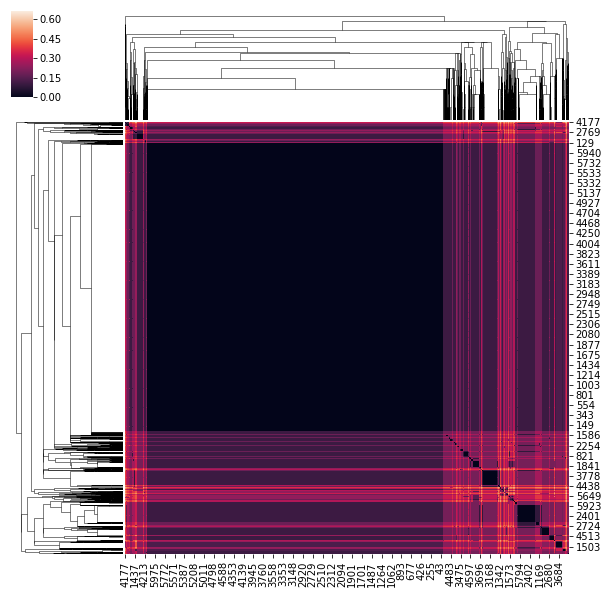

In [12]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced)

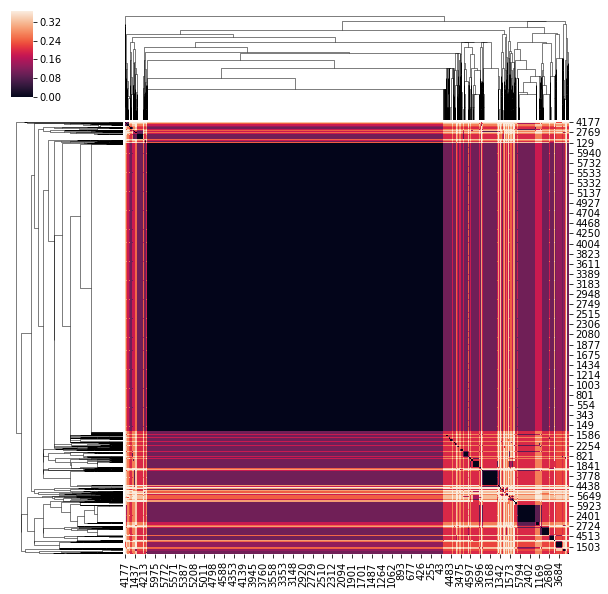

In [13]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, robust=True)

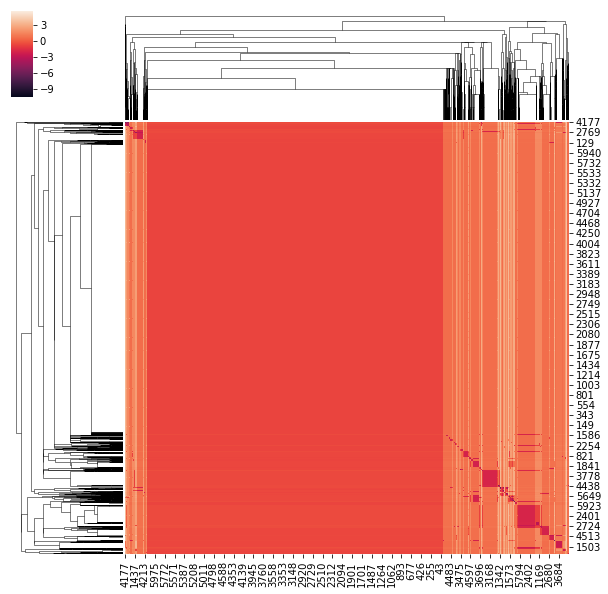

In [14]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, z_score=0)

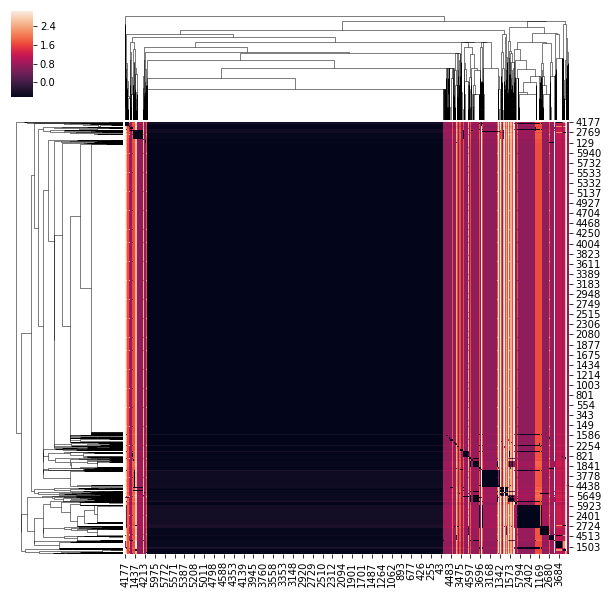

In [15]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, robust=True, z_score=0)